In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import tensorflow as tf
import nltk
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

Let's load the data and set the column names.

In [2]:
col_names=["tweet emotion", "tweet id", "tweet date", "query", "tweet user", "tweet text"  ]
data=pd.read_csv("training.1600000.processed.noemoticon.csv", 
                 names=col_names, header=None, encoding='latin1')

Let's check the first 5 records.

In [3]:
data.head()

,tweet emotion,tweet id,tweet date,query,tweet user,tweet text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


Tweet text column will be cleaned. Characters such as @, http, extra spaces will be removed.

In [4]:
data['tweet text']=data['tweet text'].str.lower()
data['tweet text']=data['tweet text'].str.replace('@\S{1,}', '', regex=True)
data['tweet text']=data['tweet text'].str.replace('http\S{1,}', '', regex=True)
data['tweet text']=data['tweet text'].str.replace('www\.\S{1,}', '', regex=True)
data['tweet text']=data['tweet text'].str.replace('\s{2,}',' ', regex=True)
data['tweet text']=data['tweet text'].str.strip()

Let's check the first 10 records after the cleaning.

In [5]:
data.iloc[:10,5]


0    - awww, that's a bummer. you shoulda got david...
1    is upset that he can't update his facebook by ...
2    i dived many times for the ball. managed to sa...
3       my whole body feels itchy and like its on fire
4    no, it's not behaving at all. i'm mad. why am ...
5                                   not the whole crew
6                                           need a hug
7    hey long time no see! yes.. rains a bit ,only ...
8                             nope they didn't have it
9                                       que me muera ?
Name: tweet text, dtype: object

Stop words are those that don't have particular meanings and don't alter the semantics of the sentences. Thus, such words will be removed.

In [6]:
stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ma']
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very',

The following will ensure that stop words are removed from Tweet Text.

In [7]:
def check_stop_words(x):
    x_list=x.split()
    for index, item in enumerate(x_list):
        if item in stop_words:
            del x_list[index]
    return " ".join(x_list)
data['tweet text']=data['tweet text'].apply(check_stop_words)
data['tweet text']=data['tweet text'].str.replace('\s{2,}',' ', regex=True)
data['tweet text']=data['tweet text'].str.strip()

data["tweet label"]=np.where(data["tweet emotion"]==4, 1, 0)

We will split the data into 70% training and 30% testing.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data["tweet text"], data["tweet label"], test_size=0.30)

In [9]:
y_train.value_counts()

1    560031
0    559969
Name: tweet label, dtype: int64

In [10]:
y_test.value_counts()

0    240031
1    239969
Name: tweet label, dtype: int64

Let's check the first 20 records of the training data.

In [11]:
X_train.iloc[1:20,]


683947                ok ur welcome nd im srry bout wat said
1195363                         aww click always makes happy
1064056    woo hoo! new gilmore girls season starts june ...
871507     hating i to work til tuesday...but happy have ...
862716                  oh, thank god hope have fab weekend!
1178444                      good luck graduation...your man
1361620             hilarous! well...now know weren't alone.
344535     am still waiting the, &quot;guess what? were j...
1276647    &quot;forget twitter, i'm the cb&quot; ... sai...
710139                  on saturday night damn anti biotics!
430672                        least have something do though
251868     was driving aimlessly around sd of million det...
1271786              pleasure! cheers, good twitter friends!
126973     motion sickness more prominent you're horribly...
190267     was dawn im sorry. didn't even know was going ...
1187832    thanks-- think i'll take up that. is schedule ...
1441896    spotted anoth

In [12]:
y_train.iloc[1:20,]

683947     0
1195363    1
1064056    1
871507     1
862716     1
1178444    1
1361620    1
344535     0
1276647    1
710139     0
430672     0
251868     0
1271786    1
126973     0
190267     0
1187832    1
1441896    1
1580708    1
678264     0
Name: tweet label, dtype: int32

The following are the hyperparameters of the model. The top 50,000 most common words are chosen to be placed in the tokenizer.

In [13]:
vocab_size = 50000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"


The following will set up and run the tensorflow model. Bidirectional LSTM is particularly useful when the order of words has an impact on the overall tone of the sentences. Drop out layer also helps in reducing overfitting.

In [14]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

num_epochs = 3
training_padded = np.array(training_padded)
training_labels = np.array(y_train)
testing_padded = np.array(testing_padded)
testing_labels = np.array(y_test)
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), 
                    verbose=1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           800000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              41472     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 24)                3096      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 844,593
Trainable params: 844,593
Non-trainable params: 0
__________________________________________________

The following will plot the accuracy and validation accuracy against the number of epochs.

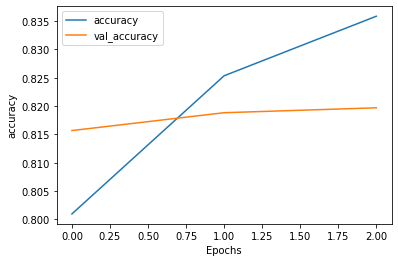

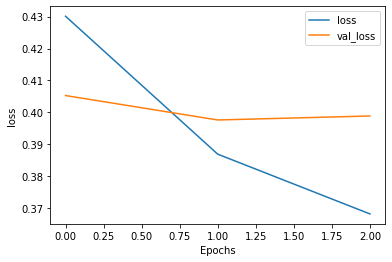

In [15]:
def plot(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()
    
plot(history, 'accuracy')
plot(history, 'loss')

The following will save the model and tokenizer for use in the Flask app.

In [16]:
# Saving the model and tokenizer
with open("tokenizer.pickle", "wb") as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
model.save("tf_model.h5")